Objective:
The objective of this project is to predict the compressive strength of concrete based on various features using linear regression. Compressive strength is a crucial property that influences the performance and durability of concrete in construction.

Dataset:
The dataset used for this project contains various properties of concrete, such as cement content, water content, superplasticizer content, age, and more. The target variable is the compressive strength of the concrete.

Applications:

Construction industry: Optimizing concrete mix designs for specific applications.
Quality control: Predicting concrete strength to ensure compliance with standards.
Research and development: Exploring the impact of different components on concrete strength.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Concrete_Data.csv')

In [3]:
data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
out=data['CMS']
inp=data.drop('CMS',axis=1)

In [5]:
inp.head(2)

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [6]:
out.head(2)

0    79.99
1    61.89
Name: CMS, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=40)

In [9]:
print(inp.shape)
print(xtrain.shape)
print(xtest.shape)


(1030, 8)
(721, 8)
(309, 8)


In [10]:
print(out.shape)
print(ytrain.shape)
print(ytest.shape)

(1030,)
(721,)
(309,)


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [13]:
lr.coef_

array([ 0.1260017 ,  0.11793314,  0.09729948, -0.09693434,  0.32923801,
        0.02937798,  0.02709272,  0.12678819])

In [14]:
xtrain.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age'],
      dtype='object')

In [15]:
coef=pd.DataFrame()

In [16]:
coef['feature']=xtrain.columns
coef['Coefficents']=lr.coef_
coef

,feature,Coefficents
0,Cement,0.126002
1,Blast,0.117933
2,Fly Ash,0.097299
3,Water,-0.096934
4,Superplasticizer,0.329238
5,CA,0.029378
6,FA,0.027093
7,Age,0.126788


In [17]:
lr.intercept_

-53.426162250845714

In [18]:
xtest.head(2)

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
808,252.0,0.0,0.0,186.0,0.0,1111.0,784.0,7
281,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,28


In [19]:
ypred=lr.predict(xtest)

In [20]:
ypred[:10]

array([15.06362052, 27.88672853, 33.51175767, 26.70994765, 37.01547854,
       62.87190032, 17.42798558, 20.82270935, 52.15233032, 49.27820973])

In [21]:
ytest.head(10)

808    11.47
281    32.66
243    40.86
589    31.90
283    44.21
136    74.50
966    12.46
14     47.81
0      79.99
752    59.76
Name: CMS, dtype: float64

In [22]:
#Differnt Error and Variance 

In [23]:
#Residue
resi=ytest-ypred

In [24]:
#np.sum(resi)

In [25]:
#Sum of Square of residue
sse=np.sum((ytest-ypred)**2)
mse=sse/len(ytest)
rmse=np.sqrt(mse)

In [26]:
sse,mse,rmse

(37293.52083981047, 120.6910059540792, 10.985945837936724)

In [27]:
out.describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: CMS, dtype: float64

In [28]:
from sklearn.metrics import r2_score,mean_squared_error

In [29]:
mean_squared_error(ytest,ypred)

120.6910059540792

In [30]:
r2_score(ytest,ypred)

0.534988162363252

In [31]:
# Model's explained varaiance is 53 percent

In [32]:
#SST, SSR, SSE
sst=np.sum((ytest-ytest.mean())**2)
ssr=np.sum((ypred-ytest.mean())**2)
sse=np.sum((ytest-ypred)**2)
print(sst,ssr,sse)

80199.07843495146 52924.612780998505 37293.52083981047


In [33]:
ssr+sse

90218.13362080898

In [34]:
ssr/(ssr+sse)

0.5866294353133387

In [35]:
1-(sse/sst)

0.534988162363252

In [36]:
# Data is properly preprocessed or not ?
# For Linear Regression
# 1. Outlier - it is required for Linear regression if outlier exist
# 2. Scaling is not Mandatory for OLS method of Linear regression
# 3. Encoding - Categorical variable
# 4. Missing Value Treatments - it is required if missing value exist
# 5. Tranformation - To make the data to be normally distributed - It may required based on assumption checking result


In [37]:
# Missing value checking
data.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

C:\Anaconda\envs\py_torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CMS'>

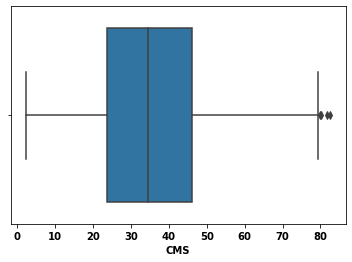

In [38]:
import seaborn as sb
sb.boxplot(data['CMS'])

In [39]:
out1=out.copy()

q1=out1.quantile(0.25)
q3=out1.quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

uc=out1.quantile(0.99)
lc=out1.quantile(0.01)

for ind1 in out1.index:
  if out1.loc[ind1]>ub:
    out1.loc[ind1]=uc
  elif out1.loc[ind1]<lb:
    out1.loc[ind1]=lc


C:\Anaconda\envs\py_torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CMS'>

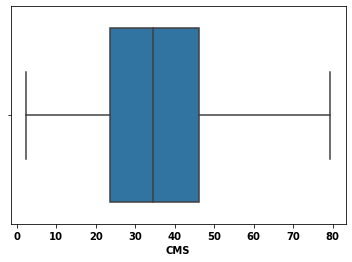

In [40]:
sb.boxplot(out1)

C:\Anaconda\envs\py_torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CMS'>

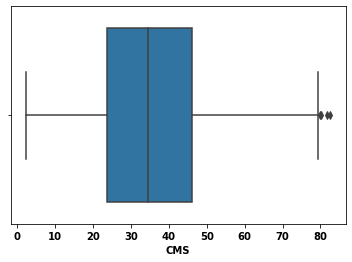

In [41]:
sb.boxplot(out)

C:\Anaconda\envs\py_torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CMS'>

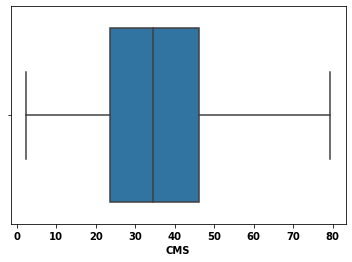

In [42]:
sb.boxplot(out1)

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out,test_size=0.3,random_state=40)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print('RMSE:',np.sqrt(mean_squared_error(ytest,ypred)))
print('Rsquare:',r2_score(ytest,ypred))

RMSE: 10.985945837936724
Rsquare: 0.534988162363252


In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(inp,out1,test_size=0.3,random_state=40)
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print('RMSE:',np.sqrt(mean_squared_error(ytest,ypred)))
print('Rsquare:',r2_score(ytest,ypred))

RMSE: 10.905540664169264
Rsquare: 0.5355720653726408


In [45]:
# Assumptions of Linear Regression
# 1. Multi collinearity
# 2. Linearity
# 3. Normality
# 4. Autocorrelation
# 5. Homoscadicity

In [46]:
#Multi collinarity - NO MULTI COLLINEARITY
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif=pd.DataFrame()
vif['features']=inp.columns
vif['VIF']=[variance_inflation_factor(inp.values,i) for i in range(inp.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
5,CA,84.955779
3,Water,82.157569
6,FA,72.790995
0,Cement,15.456717
4,Superplasticizer,5.471094
2,Fly Ash,4.147833
1,Blast,3.329127
7,Age,1.699459


In [48]:
inp1=inp.drop('CA',axis=1)
vif=pd.DataFrame()
vif['features']=inp1.columns
vif['VIF']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
3,Water,72.092772
5,FA,48.624992
0,Cement,14.484331
4,Superplasticizer,5.395416
2,Fly Ash,3.962976
1,Blast,3.298301
6,Age,1.699343


In [49]:
inp2=inp1.drop('Water',axis=1)
vif=pd.DataFrame()
vif['features']=inp2.columns
vif['VIF']=[variance_inflation_factor(inp2.values,i) for i in range(inp2.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
4,FA,14.219268
0,Cement,9.422097
2,Fly Ash,2.943716
3,Superplasticizer,2.939900
1,Blast,2.080877
5,Age,1.577309


In [50]:
inp3=inp2.drop('FA',axis=1)
vif=pd.DataFrame()
vif['features']=inp3.columns
vif['VIF']=[variance_inflation_factor(inp3.values,i) for i in range(inp3.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
3,Superplasticizer,2.921784
0,Cement,2.819482
2,Fly Ash,1.879115
4,Age,1.550374
1,Blast,1.526264


In [51]:
# As all the feature's VIF value is below 5, out data is free of multicollinearity

In [52]:
# Implementation of LR model using statsmodels library
import statsmodels.api as sm

In [53]:
#inp.head(2)

In [54]:
#inpc.head(2)

In [55]:
inpc=sm.add_constant(inp)
mod=sm.OLS(out1,inpc)
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          3.32e-206
Time:                        09:05:39   Log-Likelihood:                -3865.9
No. Observations:                1030   AIC:                             7750.
Df Residuals:                    1021   BIC:                             7794.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3442     26.507     -0.881      0.379     -75.358      28.670
Cement               0.1197      0.008     14.139      0.000       0.103       0.136
Blast                0.1036      0.010     10.255      0.000       0.084       0.123
Fly Ash              0.0880      0.013      7.017      0.000       0.063       0.113
Water               -0.1491      0.040     -3.722      0.000      -0.228      -0.070
Superplasticizer     0.2908      0.093      3.122      0.002       0.108       0.474
CA                   0.0179      0.009      1.914      0.056      -0.000       0.036
FA                   0.0203      0.011      1.901      0.058      -0.001       0.041
Age                  0.1141      0.005     21.090      0.000       0.104       0.125
==============================================================================
Omnibus:                        6.144   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.149
Skew:                          -0.189   Prob(JB):                       0.0462
Kurtosis:                       3.000   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
# the difference between rsquare and adj rsquare is 0.003 (very minimum 0.3 percentage)
# It means, our model is not having much of insginificant variable 


# Fstat is actually the stat measure for ANOVA test
# H0: grp1 mean = grp2 mean = grp3 mean

# H0: feature1 coef = feature 2 coef = feature 3 coef = 0
# Ha: not all the feature coef are zero
# pval of the anova test is greater than 0.05 --> fail to reject H0 --> all the feat coeff are zero
# If all the feature coef are zero --- y = b0

#Prob (F-statistic):	3.32e-206 --> REject the H0 ---> Out LR model is significant


# For every one unit increment in cement , the output (CMS) will increse by 0.1197, by keeping all the other inputs constant. 
# For every one unit increment in water , the output (CMS) will decrease by 0.1491, by keeping all the other inputs constant.

0.1197 - 1.96*0.008,0.1197 + 1.96*0.008

# 2 sample ttest
# H0: grp1 mean = grp2 mean

# Model 1 --- by keeping feature 1 coef as zero
# Model 2 --- by keeping feature 1 coef as it is
# If we are predicting output for the inputs using model 1 and 2, the predicted values are same, then feature 1 is not significant

#H0: Model with input feature 1 performance = Model without input feature 1 performance --- feature 1 (Cement) coeff =0

#pval -- greater than 0.05 --> Feature 1 is not significant 

(0.10402, 0.13538)

In [57]:
# Second Assumption - Normality - For model's residue = yact-ypred

#build the ols model again using the input feature that we got at the end of checking multi collinearity
inpc=sm.add_constant(inp3)
mod=sm.OLS(out1,inpc)
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     276.5
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          3.74e-187
Time:                        09:05:39   Log-Likelihood:                -3918.8
No. Observations:                1030   AIC:                             7850.
Df Residuals:                    1024   BIC:                             7879.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -11.0827      1.701     -6.517      0.000     -14.420      -7.746
Cement               0.1020      0.004     23.002      0.000       0.093       0.111
Blast                0.0752      0.005     14.792      0.000       0.065       0.085
Fly Ash              0.0597      0.008      7.422      0.000       0.044       0.076
Superplasticizer     0.7741      0.070     11.082      0.000       0.637       0.911
Age                  0.1011      0.006     18.311      0.000       0.090       0.112
==============================================================================
Omnibus:                        0.124   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.127
Skew:                           0.027   Prob(JB):                        0.938
Kurtosis:                       2.988   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
ols_mod.resid.skew()
# If skew is anything between -0.5 to +0.5, then we can say it is near normal distribution

# therefore the NORMALITY assumption is SATISFIED

0.026573776069122014

In [59]:
#What if the residue skew is above or beow the range [-0.5 to 0.5]
# residue = yact - ypred
#          = yact - (b1x1+bo)

#first option is apply the transformation on yact --> then build the LR model and check the residue's normality
#Second option (rarely works) is apply transformation on inputs (Xs) --> then build the LR model and check the residue's normality

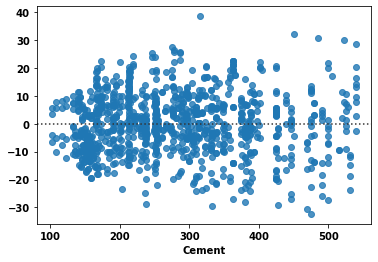

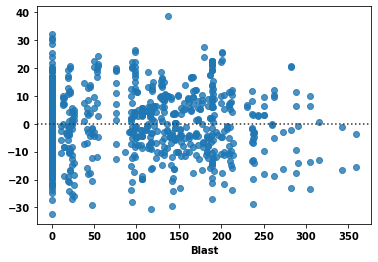

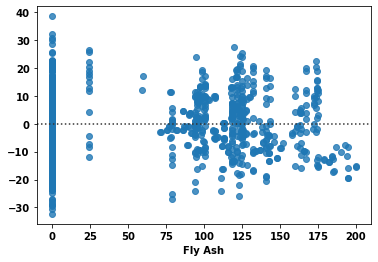

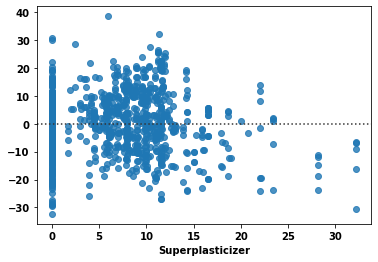

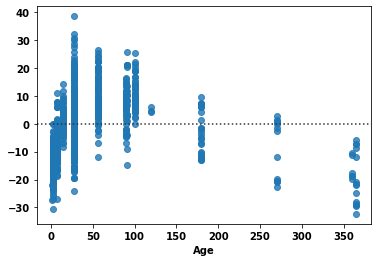

In [60]:
#Linearity
# Plot the graph between each input and model residue
# Then check for the following things
   # 1. The graph points must be random
   # 2. It should be symmetric with respect to zero residue line
from matplotlib import pyplot as plt
for i in inp3.columns:
    sb.residplot(x=inp3[i],y=ols_mod.resid)
    plt.show()
    
#By seeing the graph , we can say the Linear Assumption is Satified

In [61]:
from statsmodels.stats.diagnostic import linear_rainbow
_,p=linear_rainbow(ols_mod,frac=0.4)
p

0.2669751140459248

In [62]:
# Autocorrelation - NO autocorrelation
# Durbin watson number ~=2 (1.5 to 2.5) , then we can say NO autocorrealtion


In [63]:
from sklearn.utils import shuffle
data_sh=shuffle(data)
inp_sh=data_sh.drop('CMS',axis=1)
out_sh=data_sh['CMS']

In [64]:
inpc=sm.add_constant(inp_sh)
mod_sh=sm.OLS(out_sh,inpc)
ols_mod_sh=mod_sh.fit()
ols_mod_sh.summary()

# After shuffling, the auto correaltion durbin watson number is close to 2, therefore NO Autocorreaition

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          6.29e-206
Time:                        09:05:42   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement               0.1198      0.008     14.113      0.000       0.103       0.136
Blast                0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash              0.0879      0.013      6.988      0.000       0.063       0.113
Water               -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer     0.2922      0.093      3.128      0.002       0.109       0.476
CA                   0.0181      0.009      1.926      0.054      -0.000       0.037
FA                   0.0202      0.011      1.887      0.059      -0.001       0.041
Age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Anaconda\envs\py_torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

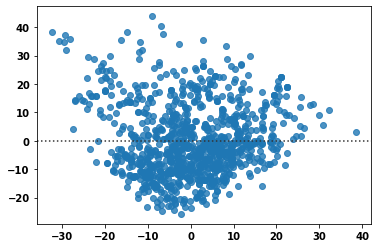

In [65]:
# Homoscadasticity - Uniform Variance
sb.residplot(ols_mod.resid,ols_mod.predict())

In [66]:
from statsmodels.stats.api import het_goldfeldquandt
#H0: Model is Homoscadastic
_,p,_=het_goldfeldquandt(ols_mod.resid,inp3)
p

0.9999999999999999

In [67]:
# All the Assumptions of Linear Regression is Satisfied

In [68]:
# The final data which is passing all the assumptions are 
# inp3 and out1

In [69]:
xtrain3,xtest3,ytrain3,ytest3=train_test_split(inp3,out1,test_size=0.3)

In [70]:
xtrain3,xtest3,ytrain3,ytest3=train_test_split(inp3,out1,test_size=0.3)
lr=LinearRegression()
lr.fit(xtrain3,ytrain3)
ypred=lr.predict(xtest3)
print('r_square',r2_score(ytest3,ypred))

r_square 0.5630265547320019


In [71]:
#0.47 to 0.58
#0.50 to 0.59

In [72]:
#0.34 to 0.35
#0.85 to 0.87

In [73]:
# Feature Engineering 
      # -- Feature Selection (selection best n feature from the total N feature)
            #N=10 --> M1 
            #n=5--> M2
            #M2 model R2 will be less than M1 model
      # -- Feature Derivation (Creation)
            # incerase R2 without much of deviation 

In [74]:
pval=ols_mod.pvalues[1:]
pval[pval>0.05]

Series([], dtype: float64)

In [75]:
ols_mod.rsquared_adj

0.5724322695525992

In [76]:
!pip install mlxtend

In [77]:
!pip install mlxtend --upgrade

  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.20.0
    Uninstalling mlxtend-0.20.0:
      Successfully uninstalled mlxtend-0.20.0


In [78]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [79]:
#Backward Elimination
lr=LinearRegression()
backward=sfs(estimator=lr,k_features='best',forward=False)
sfs_back=backward.fit(inp,out1)
back_feat=list(sfs_back.k_feature_names_)
back_feat

['Cement', 'Blast', 'Fly Ash', 'Water', 'Age']

In [80]:
#Forward Selection
lr=LinearRegression()
forward=sfs(estimator=lr,k_features='best',forward=True)
sfs_forw=forward.fit(inp,out1)
forw_feat=list(sfs_forw.k_feature_names_)
forw_feat

['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'Age']

In [81]:
inp.head(2)

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [82]:
inp[back_feat].head(2)

,Cement,Blast,Fly Ash,Water,Age
0,540.0,0.0,0.0,162.0,28
1,540.0,0.0,0.0,162.0,28


In [83]:
xtrain3,xtest3,ytrain3,ytest3=train_test_split(inp[back_feat],out1,test_size=0.3,random_state=48)
lr=LinearRegression()
lr.fit(xtrain3,ytrain3)
ypred=lr.predict(xtest3)
print('Backward_Elimination_r_square',r2_score(ytest3,ypred))

Backward_Elimination_r_square 0.606206260847526


In [84]:
xtrain3,xtest3,ytrain3,ytest3=train_test_split(inp[forw_feat],out1,test_size=0.3,random_state=48)
lr=LinearRegression()
lr.fit(xtrain3,ytrain3)
ypred=lr.predict(xtest3)
print('Forward_Selection_r_square',r2_score(ytest3,ypred))

Forward_Selection_r_square 0.6110997877912688


In [85]:
np.std(np.array([0.8,0.85,0.83,0.87,0.8]))/np.mean(np.array([0.8,0.85,0.83,0.87,0.8])) # coefficeint of variance

0.033214575306241466

## 
https://drive.google.com/file/d/1vjNVpPLjf1P4B9_CXv3TxPbAYf-2Y8f1/view?usp=share_link


In [86]:
from sklearn.model_selection import cross_val_score

In [87]:
lr=LinearRegression()

In [88]:
score=cross_val_score(lr,inp,out,cv=5,scoring='r2')
print(score)
bias_score=np.mean(score)
bias_err=1-bias_score
print('Bias Error:',bias_err)
var_err=np.std(score)/np.mean(score)*100
print('Variance Error:',var_err)

[0.33015205 0.41207076 0.45175533 0.60725028 0.50374183]
Bias Error: 0.5390059508337136
Variance Error: 20.073653507348418


In [89]:
# Model's variance error is 20 percent, which means 
  #huge deviation in performance, Hence it is overfitting
#Also model bias score is only 0.47 (boas error =0.53), which is generally
   # a low value, which means model is undersfitting too

## https://codeshare.io/nzpopY

In [90]:
score=cross_val_score(lr,inp[back_feat],out,cv=5,scoring='r2')
print(score)
bias_score=np.mean(score)
bias_err=1-bias_score
print('Bias Error:',bias_err)
var_err=np.std(score)/np.mean(score)*100
print('Variance Error:',var_err)

[0.44751326 0.42694953 0.45180451 0.600946   0.53788915]
Bias Error: 0.5069795117720629
Variance Error: 13.391829460842972


In [91]:
score=cross_val_score(lr,inp[forw_feat],out,cv=5,scoring='r2')
print(score)
bias_score=np.mean(score)
bias_err=1-bias_score
print('Bias Error:',bias_err)
var_err=np.std(score)/np.mean(score)*100
print('Variance Error:',var_err)

[0.35781776 0.43115424 0.46351788 0.61739705 0.51889462]
Bias Error: 0.5222436893290692
Variance Error: 18.235758251337792


In [92]:
back_feat

['Cement', 'Blast', 'Fly Ash', 'Water', 'Age']

In [93]:
lr=LinearRegression()
lr.fit(xtrain[back_feat],ytrain)

LinearRegression()

In [94]:
lr.coef_

array([ 0.11041697,  0.09874902,  0.08029184, -0.23367282,  0.12582968])

In [95]:
from sklearn.linear_model import Ridge, Lasso

In [96]:
rid=Ridge(alpha=1,normalize=True)
rid.fit(xtrain,ytrain)


C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=1, normalize=True)

In [97]:
rid.coef_

array([ 0.03585533,  0.01839958, -0.0060114 , -0.10686599,  0.40538235,
       -0.0130741 , -0.01904314,  0.05587905])

In [98]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
coef_lr=lr.coef_

rid_11=Ridge(alpha=0.01,normalize=True)
rid_11.fit(xtrain,ytrain)
coef_rid_11=rid_11.coef_

rid_1=Ridge(alpha=0.1,normalize=True)
rid_1.fit(xtrain,ytrain)
coef_rid_1=rid_1.coef_

rid_5=Ridge(alpha=0.5,normalize=True)
rid_5.fit(xtrain,ytrain)
coef_rid_5=rid_5.coef_

rid_2=Ridge(alpha=2,normalize=True)
rid_2.fit(xtrain,ytrain)
coef_rid_2=rid_2.coef_

rid_10=Ridge(alpha=10,normalize=True)
rid_10.fit(xtrain,ytrain)
coef_rid_10=rid_10.coef_

res_coef=pd.DataFrame({'LR':coef_lr,
                       'Rid_0.01':coef_rid_11,
              'Rid_0.1':coef_rid_1,
              'Rid_0.5':coef_rid_5,
              'Rid_2':coef_rid_2,
              'Rid_10':coef_rid_10})


C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

In [99]:
res_coef.index=xtrain.columns
res_coef

,LR,Rid_0.01,Rid_0.1,Rid_0.5,Rid_2,Rid_10
Cement,0.125857,0.110780,0.073310,0.047277,0.024708,0.007213
Blast,0.117677,0.099462,0.054657,0.027346,0.011426,0.002909
Fly Ash,0.097135,0.075697,0.023162,-0.002389,-0.006128,-0.002378
Water,-0.097424,-0.145606,-0.206665,-0.146367,-0.070659,-0.019636
Superplasticizer,0.328502,0.332185,0.432442,0.479233,0.294904,0.089730
CA,0.029229,0.015042,-0.011756,-0.015038,-0.009976,-0.003294
FA,0.026983,0.009778,-0.023946,-0.024858,-0.012600,-0.003296
Age,0.126759,0.124096,0.109460,0.076302,0.036491,0.009677


In [100]:
alp=[0,0.001,0.005,0.01,0.05,0.1,0.5,1,2,5,10]
bias_error_rid=[]
var_error_rid=[]
for i in alp:
  rid=Ridge(alpha=i,normalize=True)
  score=cross_val_score(rid,inp,out,cv=5,scoring='r2')
  bias_score=np.mean(score)
  bias_error_rid.append(1-bias_score)
  var_error_rid.append(np.std(score)/np.mean(score))

res_rid=pd.DataFrame({'alpha':alp,
             'bias_error':bias_error_rid,
             'var_error':var_error_rid})


C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

In [101]:
res_rid

,alpha,bias_error,var_error
0,0.000,0.539006,0.200737
1,0.001,0.538521,0.198412
2,0.005,0.537454,0.191188
3,0.010,0.537322,0.185170
4,0.050,0.546157,0.169590
5,0.100,0.558945,0.165264
6,0.500,0.659789,0.132284
7,1.000,0.765620,0.211892
8,2.000,0.902258,1.161482
9,5.000,1.071109,-2.767953


In [102]:
alp=[0,0.001,0.005,0.01,0.05,0.1,0.5,1,2,5,10]
bias_error_rid=[]
var_error_rid=[]
for i in alp:
  rid=Ridge(alpha=i,normalize=True)
  score=cross_val_score(rid,inp[back_feat],out,cv=3,scoring='r2')
  bias_score=np.mean(score)
  bias_error_rid.append(1-bias_score)
  var_error_rid.append(np.std(score)/np.mean(score))

res_rid=pd.DataFrame({'alpha':alp,
             'bias_error':bias_error_rid,
             'var_error':var_error_rid})


C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

In [103]:
res_rid

,alpha,bias_error,var_error
0,0.000,0.435198,0.088754
1,0.001,0.435262,0.088823
2,0.005,0.435603,0.089137
3,0.010,0.436203,0.089610
4,0.050,0.446071,0.095841
5,0.100,0.465401,0.106985
6,0.500,0.628673,0.192728
7,1.000,0.756542,0.276455
8,2.000,0.890625,0.571895
9,5.000,1.033684,-2.253956


In [104]:
alp=[0,0.001,0.005,0.01,0.05,0.1,0.5,1,2,5,10]
bias_error_rid=[]
var_error_rid=[]
for i in alp:
  las=Lasso(alpha=i,normalize=True)
  score=cross_val_score(las,inp[back_feat],out,cv=5,scoring='r2')
  bias_score=np.mean(score)
  bias_error_rid.append(1-bias_score)
  var_error_rid.append(np.std(score)/np.mean(score))

res_las=pd.DataFrame({'alpha':alp,
             'bias_error':bias_error_rid,
             'var_error':var_error_rid})


C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\envs\py_torch\lib\site-p

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:


In [106]:
res_las

,alpha,bias_error,var_error
0,0.000,0.506980,0.133918
1,0.001,0.507490,0.131758
2,0.005,0.510922,0.123209
3,0.010,0.518332,0.113243
4,0.050,0.660531,0.241253
5,0.100,0.839018,1.064942
6,0.500,1.276192,-1.034952
7,1.000,1.276192,-1.034952
8,2.000,1.276192,-1.034952
9,5.000,1.276192,-1.034952


In [111]:
xtrain.head(2)

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
967,154.8,183.4,0.0,193.3,9.1,877.2,867.7,28
777,339.0,0.0,0.0,185.0,0.0,1069.0,754.0,28


In [116]:
from sklearn.preprocessing import StandardScaler
# (xi-xmean) / xstd

sc=StandardScaler()
xtrain_sc=sc.fit_transform(xtrain)

xtrain_sc=pd.DataFrame(xtrain_sc)

ytrain_sc=(ytrain-ytrain.mean())/ytrain.std()


xtest_sc=sc.transform(xtest)
xtest_sc=pd.DataFrame(xtest_sc)

ytest_sc=(ytest-ytrain.mean())/ytrain.std()

# For GD, we must do scaling for input, output scaling is not mandatory (but nothing wrong in scaling the output too, 
                                                         # as we can inverse it to original scale for bussiness explanation)

In [133]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(random_state=48)
sgd.fit(xtrain_sc,ytrain_sc)
ypred_sc=sgd.predict(xtest_sc)
r2_score(ytest_sc,ypred_sc)

0.5360560052065494

In [130]:
ypred_sc[:5]

array([-1.13285934, -0.52995895, -0.21750625, -0.46608885, -0.00762466])

In [134]:
#y_sc= (yi-ymean)/ystd --> ypred_sc*ytrain.std() + ytrain.mean()

In [135]:
#ypred_sc*ytrain.std() + ytrain.mean()

In [123]:
ytest.head(5)

808    11.47
281    32.66
243    40.86
589    31.90
283    44.21
Name: CMS, dtype: float64

In [143]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)

inp_pf=pf.fit_transform(inp[back_feat])
inp_pf=pd.DataFrame(inp_pf)
inp_pf.columns=pf.get_feature_names()

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [144]:
inp_pf.head()

,x0,x1,x2,x3,x4,x0 x1,x0 x2,x0 x3,x0 x4,x1 x2,x1 x3,x1 x4,x2 x3,x2 x4,x3 x4
0,540.0,0.0,0.0,162.0,28.0,0.00,0.0,87480.0,15120.0,0.0,0.0,0.0,0.0,0.0,4536.0
1,540.0,0.0,0.0,162.0,28.0,0.00,0.0,87480.0,15120.0,0.0,0.0,0.0,0.0,0.0,4536.0
2,332.5,142.5,0.0,228.0,270.0,47381.25,0.0,75810.0,89775.0,0.0,32490.0,38475.0,0.0,0.0,61560.0
3,332.5,142.5,0.0,228.0,365.0,47381.25,0.0,75810.0,121362.5,0.0,32490.0,52012.5,0.0,0.0,83220.0
4,198.6,132.4,0.0,192.0,360.0,26294.64,0.0,38131.2,71496.0,0.0,25420.8,47664.0,0.0,0.0,69120.0


In [145]:
inp[back_feat].head()

,Cement,Blast,Fly Ash,Water,Age
0,540.0,0.0,0.0,162.0,28
1,540.0,0.0,0.0,162.0,28
2,332.5,142.5,0.0,228.0,270
3,332.5,142.5,0.0,228.0,365
4,198.6,132.4,0.0,192.0,360


In [147]:
inpc=sm.add_constant(inp_pf)
mod=sm.OLS(out1,inpc)
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     158.2
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          6.40e-253
Time:                        11:54:45   Log-Likelihood:                -3737.8
No. Observations:                1030   AIC:                             7508.
Df Residuals:                    1014   BIC:                             7587.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.8282     18.942     -1.100      0.272     -57.998      16.341
x0             0.1709      0.039      4.343      0.000       0.094       0.248
x1             0.1292      0.056      2.324      0.020       0.020       0.238
x2             0.1011      0.075      1.352      0.177      -0.046       0.248
x3             0.0938      0.101      0.926      0.355      -0.105       0.292
x4             0.3883      0.052      7.446      0.000       0.286       0.491
x0 x1          0.0002   4.46e-05      3.846      0.000     8.4e-05       0.000
x0 x2          0.0002   5.72e-05      2.709      0.007    4.27e-05       0.000
x0 x3         -0.0005      0.000     -2.124      0.034      -0.001   -3.45e-05
x0 x4          0.0002   6.08e-05      3.821      0.000       0.000       0.000
x1 x2          0.0002   7.69e-05      2.718      0.007    5.81e-05       0.000
x1 x3         -0.0006      0.000     -2.114      0.035      -0.001   -4.22e-05
x1 x4          0.0006   7.43e-05      7.734      0.000       0.000       0.001
x2 x3         -0.0007      0.000     -1.753      0.080      -0.001    7.99e-05
x2 x4          0.0016      0.000     10.095      0.000       0.001       0.002
x3 x4         -0.0020      0.000     -8.018      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        5.754   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                7.241
Skew:                           0.029   Prob(JB):                       0.0268
Kurtosis:                       3.407   Cond. No.                     4.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
lr=LinearRegression()
backward=sfs(estimator=lr,k_features='best',forward=False)
sfs_back=backward.fit(inp_pf,out1)
back_feat_pf=list(sfs_back.k_feature_names_)
back_feat_pf

['x1', 'x3', 'x4', 'x0 x1', 'x0 x3', 'x2 x3', 'x2 x4']

In [149]:
inpc=sm.add_constant(inp_pf[back_feat_pf])
mod=sm.OLS(out1,inpc)
ols_mod=mod.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMS   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     278.8
Date:                Sun, 18 Dec 2022   Prob (F-statistic):          5.91e-232
Time:                        11:59:53   Log-Likelihood:                -3808.8
No. Observations:                1030   AIC:                             7634.
Df Residuals:                    1022   BIC:                             7673.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.0035      3.004     20.971      0.000      57.108      68.899
x1             0.0676      0.012      5.820      0.000       0.045       0.090
x3            -0.3976      0.018    -21.663      0.000      -0.434      -0.362
x4             0.0917      0.005     16.899      0.000       0.081       0.102
x0 x1          0.0001   4.09e-05      2.808      0.005    3.46e-05       0.000
x0 x3          0.0006   2.54e-05     22.790      0.000       0.001       0.001
x2 x3          0.0001    4.2e-05      2.848      0.004    3.72e-05       0.000
x2 x4          0.0017      0.000     11.928      0.000       0.001       0.002
==============================================================================
Omnibus:                        8.669   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.329
Skew:                          -0.165   Prob(JB):                      0.00942
Kurtosis:                       3.329   Cond. No.                     5.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [151]:
inp_final=inp_pf[back_feat_pf]-inp_pf[back_feat_pf].mean()
vif=pd.DataFrame()
vif['features']=inp_final.columns
vif['VIF']=[variance_inflation_factor(inp_final.values,i) for i in range(inp_final.shape[1])]
vif.sort_values('VIF',ascending=False)

,features,VIF
0,x1,10.757851
3,x0 x1,9.064557
4,x0 x3,2.651316
5,x2 x3,2.412204
6,x2 x4,2.121194
1,x3,1.644022
2,x4,1.256916


In [154]:
data1=pd.read_excel('delivery.xlsx')

In [162]:
data1['Region'].value_counts() 
#Replace C with 17, B with 16, A with 14 -- Frequency Encoding

C    17
B    16
A    14
Name: Region, dtype: int64

In [163]:
data1.groupby('Region')['Minutes'].mean()
#Replace C with 340., B with 336.9, A with 434 -- Target Encoding

Region
A    434.728571
B    336.956250
C    340.069379
Name: Minutes, dtype: float64

In [165]:
tab=data1['Region'].value_counts() 
data1['Region'].map(tab).head(3)

0    16
1    16
2    17
Name: Region, dtype: int64

In [160]:
data1.head(5)

,Trip,Region,Parcels,TruckAge,Minutes
0,1,B,46,11,461.9
1,2,B,32,1,273.1
2,3,C,42,14,489.4
3,4,B,30,13,303.0
4,5,B,36,15,367.7


In [157]:
inp11=data1.drop('Minutes',axis=1)
out11=data1['Minutes']

In [166]:
inp22=pd.get_dummies(inp11,drop_first=True)

In [167]:
inp22=inp22.drop('Trip',axis=1)

In [168]:
lr=LinearRegression()
lr.fit(inp22,out11)

LinearRegression()

In [169]:
lr.coef_

array([   9.92491624,    3.68384713, -106.49845371, -107.71268176])

In [170]:
inp22.columns

Index(['Parcels', 'TruckAge', 'Region_B', 'Region_C'], dtype='object')

In [ ]:
# One unit increase in parcel count will increase the time taken by 9.92 minutes, provided all the inputs remains same
# One unit increase in truck age will increase the time taken by 3.62 minutes

# The time taken to deliver the parcel in region B is 106 minutes less than region A
# The time taken to deliver the parcel in region C is 107 minutes less than region A

In [ ]:
# GridSerachCV
# parameters - Mathematical approach or realtionship exist  (linear regression coefficients)

# Hyperparameters - which have impact on model performance , but we cant model it mathematically (like penalty factor alpha)

In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
hyp_par={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.3,0.5,0.8,1,1.2,1.8,2,3,5,10,20,30,50,100]}
rid=Ridge(normalize=True)
grid_mod=GridSearchCV(rid,param_grid=hyp_par,cv=5,scoring='r2')

In [173]:
tun_rid=grid_mod.fit(xtrain,ytrain)

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skl

In [174]:
tun_rid.best_params_

{'alpha': 0.001}

In [175]:
tun_rid.best_score_

0.6182517887899548

In [176]:
from sklearn.linear_model import ElasticNet

In [177]:
# For elasticnet
from sklearn.linear_model import ElasticNet
hyp_par={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.3,0.5,0.8,1,1.2,1.8,2,3,5,10,20,30,50,100],
        'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
enet=ElasticNet(normalize=True)
grid_mod=GridSearchCV(enet,param_grid=hyp_par,cv=5,scoring='r2')

In [178]:
tun_mod=grid_mod.fit(xtrain,ytrain)

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Anaconda\envs\py_torch\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed 

In [179]:
tun_mod.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.5}

In [180]:
tun_mod.best_score_

0.618336151202039

In [183]:
results=pd.DataFrame(tun_mod.cv_results_)

In [186]:
results.iloc[:,4:].head(5)

,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.00001,0.1,"{'alpha': 1e-05, 'l1_ratio': 0.1}",0.628175,0.602318,0.603143,0.652671,0.605051,0.618272,0.019695,7
1,0.00001,0.2,"{'alpha': 1e-05, 'l1_ratio': 0.2}",0.628263,0.602092,0.603005,0.652936,0.605213,0.618302,0.019834,6
2,0.00001,0.3,"{'alpha': 1e-05, 'l1_ratio': 0.3}",0.628347,0.601846,0.602850,0.653202,0.605371,0.618323,0.019978,4
3,0.00001,0.4,"{'alpha': 1e-05, 'l1_ratio': 0.4}",0.628425,0.601579,0.602678,0.653466,0.605526,0.618335,0.020130,2
4,0.00001,0.5,"{'alpha': 1e-05, 'l1_ratio': 0.5}",0.628497,0.601290,0.602488,0.653730,0.605676,0.618336,0.020288,1
